# Assignment 1

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calplot
import scipy.stats as stats
import folium
from folium.plugins import HeatMapWithTime

## Data Wrangling

In [30]:
# Load data
df_2003 = pd.read_csv(
    '/Users/mathiaskroismoller/Library/Mobile Documents/com~apple~CloudDocs/Documents/DTU/Kanditat/1. Semester /Social Data Analysis/Exercises/Lecture 1/Data/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20250204.csv',
    sep=',')  
df_2018 = pd.read_csv(
    '/Users/mathiaskroismoller/Library/Mobile Documents/com~apple~CloudDocs/Documents/DTU/Kanditat/1. Semester /Social Data Analysis/Exercises/Lecture 1/Data/Police_Department_Incident_Reports__2018_to_Present_20250204.csv',
    sep=',')  

Add "year" column to first dataset

In [31]:
df_2003["year"] = df_2003["Date"].str.extract(r'(\d{4})$').astype(int)

### Merge datasets

First we investigate the categeories in the two datasets

In [32]:
# Print column names for both datasets
print("Columns in df1:")
print(df_2003.columns.tolist())

print("\nColumns in df2:")
print(df_2018.columns.tolist())

# Print unique categories for both datasets
print("\nUnique categories in df1:")
print(df_2003['Category'].unique())

print("\nUnique categories in df2:")
print(df_2018['Incident Category'].unique())

print("\nUnique subcategories in df2:")
print(df_2018['Incident Subcategory'].unique())

Columns in df1:
['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'location', 'SF Find Neighborhoods 2 2', 'Current Police Districts 2 2', 'Current Supervisor Districts 2 2', 'Analysis Neighborhoods 2 2', 'DELETE - Fire Prevention Districts 2 2', 'DELETE - Police Districts 2 2', 'DELETE - Supervisor Districts 2 2', 'DELETE - Zip Codes 2 2', 'DELETE - Neighborhoods 2 2', 'DELETE - 2017 Fix It Zones 2 2', 'Civic Center Harm Reduction Project Boundary 2 2', 'Fix It Zones as of 2017-11-06  2 2', 'DELETE - HSOC Zones 2 2', 'Fix It Zones as of 2018-02-07 2 2', 'CBD, BID and GBD Boundaries as of 2017 2 2', 'Areas of Vulnerability, 2016 2 2', 'Central Market/Tenderloin Boundary 2 2', 'Central Market/Tenderloin Boundary Polygon - Updated 2 2', 'HSOC Zones as of 2018-06-05 2 2', 'OWED Public Spaces 2 2', 'Neighborhoods 2', 'year']

Columns in df2:
['Incident Datetime', 'Incident Date', 'Incident Time', 'I

Now mergeing the datasets based on the catageries that seem to relate

In [33]:
# Load datasets
df1 = df_2003
df2 = df_2018

# Define column mapping for df1, including x and y
column_mapping = {
    'IncidntNum': 'IncidentNumber',
    'Incident Code': 'IncidentCode',
    'Category': 'Category',
    'Descript': 'Subcategory', 
    'Date': 'Date',
    'Time': 'Time',
    'PdDistrict': 'PoliceDistrict',
    'Resolution': 'Resolution',
    'year': 'Year',
    'X': 'Longitude',   
    'Y': 'Latitude'     
}

# Select and rename columns in df1
df1 = df1[list(column_mapping.keys())].rename(columns=column_mapping)

# Select and rename columns in df2 (adding Latitude, Longitude to the list)
df2 = df2[['Incident Number', 'Incident Code', 'Incident Category', 'Incident Subcategory', 
           'Incident Date', 'Incident Time', 'Police District', 'Resolution', 'Incident Year',
           'Latitude', 'Longitude']]
df2.columns = ['IncidentNumber', 'IncidentCode', 'Category', 'Subcategory', 'Date', 
               'Time', 'PoliceDistrict', 'Resolution', 'Year', 'Latitude', 'Longitude']

df1 = df1.apply(lambda x: x.str.upper() if x.dtype == "object" else x)
df2 = df2.apply(lambda x: x.str.upper() if x.dtype == "object" else x)

# Define the category mapping
category_mapping = {
    "LARCENY/THEFT": {"Category": ["LARCENY THEFT"], "Subcategory": ["LARCENY THEFT - OTHER", "LARCENY - FROM VEHICLE", "LARCENY THEFT - BICYCLE", "LARCENY THEFT - SHOPLIFTING", "LARCENY THEFT - FROM BUILDING", "LARCENY THEFT - PICKPOCKET", "LARCENY - AUTO PARTS", "LARCENY THEFT - PURSE SNATCH"]},
    "VEHICLE THEFT": {"Category": ["MOTOR VEHICLE THEFT"], "Subcategory": ["MOTOR VEHICLE THEFT (ATTEMPTED)"]},
    "STOLEN PROPERTY": {"Category": ["STOLEN PROPERTY"], "Subcategory": []},
    "DRUG/NARCOTIC": {"Category": ["DRUG VIOLATION", "DRUG OFFENSE"], "Subcategory": []},
    "ASSAULT": {"Category": ["ASSAULT"], "Subcategory": ["SIMPLE ASSAULT", "AGGRAVATED ASSAULT"]},
    "ROBBERY": {"Category": ["ROBBERY"], "Subcategory": ["ROBBERY - CARJACKING", "ROBBERY - OTHER", "ROBBERY - COMMERCIAL", "ROBBERY - STREET", "ROBBERY - RESIDENTIAL"]},
    "BURGLARY": {"Category": ["BURGLARY"], "Subcategory": ["BURGLARY - OTHER", "BURGLARY - COMMERCIAL", "BURGLARY - RESIDENTIAL", "BURGLARY - HOT PROWL"]},
    "VANDALISM": {"Category": ["VANDALISM", "MALICIOUS MISCHIEF"], "Subcategory": []},
    "WEAPON LAWS": {"Category": ["WEAPONS CARRYING ETC", "WEAPONS OFFENSE", "WEAPONS OFFENCE"], "Subcategory": []},
    "SEX OFFENSES, FORCIBLE": {"Category": ["RAPE"], "Subcategory": ["RAPE - ATTEMPTED"]},
    "SEX OFFENSES, NON FORCIBLE": {"Category": ["SEX OFFENSE"], "Subcategory": []},
    "PROSTITUTION": {"Category": ["PROSTITUTION"], "Subcategory": []},
    "DRIVING UNDER THE INFLUENCE": {"Category": ["TRAFFIC VIOLATION ARREST"], "Subcategory": []},
    "KIDNAPPING": {"Category": ["KIDNAPPING"], "Subcategory": []},
    "EXTORTION": {"Category": ["EXTORTION-BLACKMAIL"], "Subcategory": []},
    "GAMBLING": {"Category": ["GAMBLING"], "Subcategory": []},
    "BRIBERY": {"Category": ["BRIBERY"], "Subcategory": []},
    "FRAUD/FINANCIAL CRIME": {"Category": ["FRAUD", "FORGERY AND COUNTERFEITING", "BAD CHECKS", "EMBEZZLEMENT"], "Subcategory": []},
    "LOITERING": {"Category": ["LOITERING"], "Subcategory": []},
    "DRUNKENNESS": {"Category": ["LIQUOR LAWS"], "Subcategory": ["LIQUOR LAW VIOLATION"]},
    "DISORDERLY CONDUCT": {"Category": ["DISORDERLY CONDUCT"], "Subcategory": []},
    "TRESPASS": {"Category": ["SUSPICIOUS OCC", "SUSPICIOUS"], "Subcategory": ["TRESPASS"]},
    "HOMICIDE": {"Category": ["HOMICIDE"], "Subcategory": ["MANSLAUGHTER", "HOMICIDE - EXCUSABLE"]},
    "SUICIDE": {"Category": ["SUICIDE"], "Subcategory": []},
    "MISSING PERSON": {"Category": ["MISSING PERSON"], "Subcategory": ["MISSING ADULT"]},
    "TRAFFIC INCIDENT": {"Category": ["TRAFFIC COLLISION"], "Subcategory": ["TRAFFIC COLLISION - HIT & RUN"]},
    "HUMAN TRAFFICKING": {"Category": ["HUMAN TRAFFICKING, COMMERCIAL SEX ACTS", "HUMAN TRAFFICKING (A), COMMERCIAL SEX ACTS", "HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE", "HUMAN TRAFFICKING, INVOLUNTARY SERVITUDE"], "Subcategory": []},
    "OFFENSES AGAINST FAMILY & CHILDREN": {"Category": ["OFFENCES AGAINST THE FAMILY AND CHILDREN"], "Subcategory": []},
    "OTHER OFFENSES": {"Category": ["OTHER OFFENSES", "OTHER", "OTHER MISCELLANEOUS", "CASE CLOSURE", "CIVIL SIDEWALKS"], "Subcategory": []},
    "NON-CRIMINAL": {"Category": ["NON-CRIMINAL"], "Subcategory": ["COURTESY REPORT"]},
}

# Function to clean and map categories
def map_category(row):
    category = row['Category'].upper().strip() if pd.notna(row['Category']) else ""
    subcategory = row['Subcategory'].upper().strip() if pd.notna(row['Subcategory']) else ""

    for target, mapping in category_mapping.items():
        if category in mapping["Category"] or subcategory in mapping["Subcategory"]:
            return target
    
    return category if category else "UNKNOWN"

# Apply category mapping to both datasets
df1['Category'] = df1.apply(map_category, axis=1)
df2['Category'] = df2.apply(map_category, axis=1)

# Ensure 'Date' is in datetime format
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')

# Merge datasets
df = pd.concat([df1, df2], ignore_index=True).dropna()


## Part 1
### Temporal patterns

To start off easily, let's count the number of crimes per year:

In [34]:
crime_counts_per_year = df["Year"].value_counts().sort_values(ascending=False)
print(crime_counts_per_year)


Year
2018    188712
2015    151459
2017    149487
2013    147664
2016    145993
2014    144844
2003    142803
2004    142054
2019    138377
2005    137048
2012    135464
2008    135242
2009    134309
2006    131856
2007    131771
2010    127758
2022    127304
2011    126713
2023    124849
2021    121582
2020    111867
2024    101963
2025      7175
Name: count, dtype: int64



Q1: What is the year with most crimes?

Answer: 2018 had teh most crimes


Q2: What is the year with the fewest crimes?.

Answer: 2025 obviously has had the fewest crimes so far... But for completed years, it is 2024 that has the lowest crime count. 


####  Task: Create a barplot of crimes-per-year (years on the x-axis, crime-counts on the y-axis).

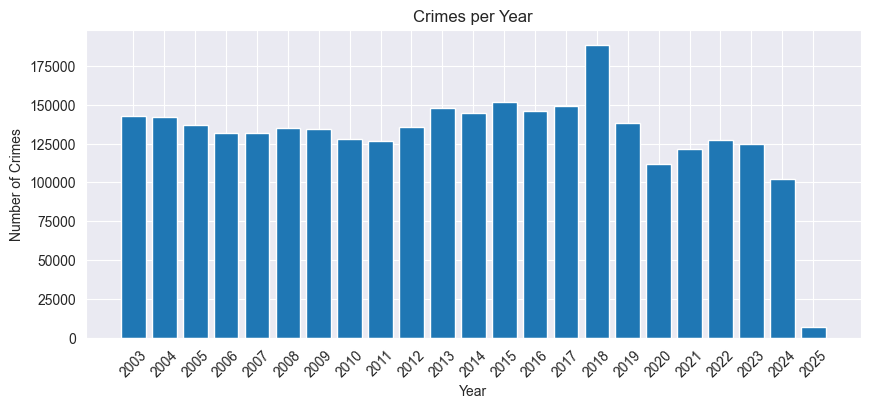

In [35]:
# Count occurrences of each year
yearly_counts = df['Year'].value_counts().sort_index()

# Create bar plot
plt.figure(figsize=(10, 4))
plt.bar(yearly_counts.index, yearly_counts.values)
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.xticks(ticks=yearly_counts.index, labels=yearly_counts.index, rotation=45)  
plt.title("Crimes per Year")
plt.show()


####  Task: Finally, Police chief Suneman is interested in the temporal development of only a **subset of categories, the so-called *focus crimes***. Those categories are listed below (for convenient copy-paste action). Create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2025.

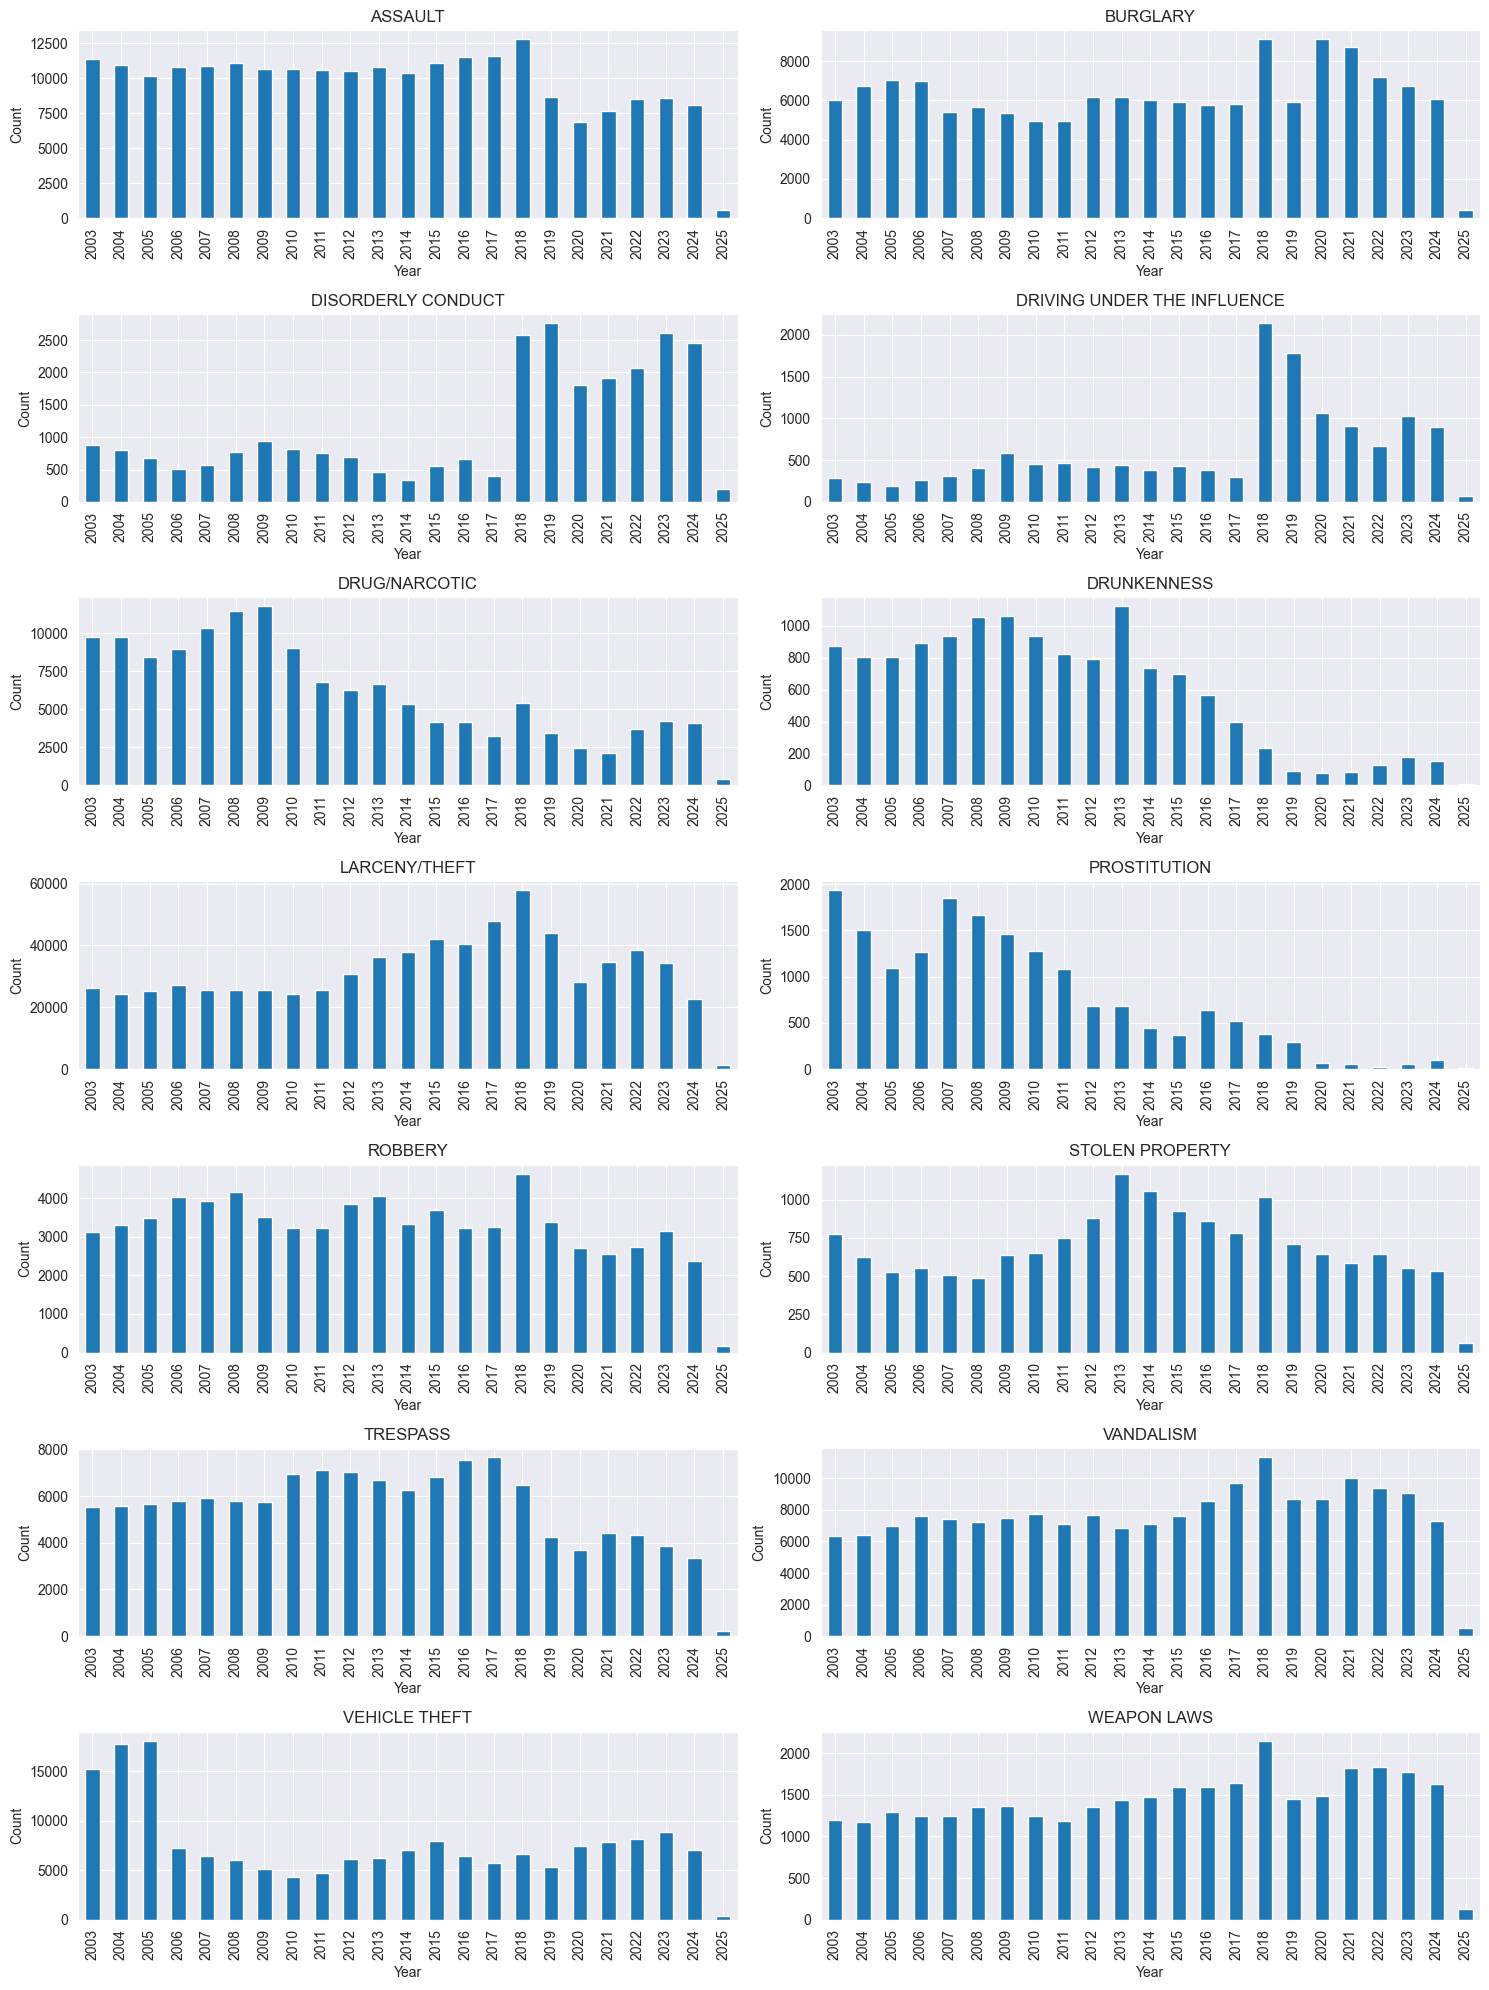

In [36]:
focuscrimes = {'WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT',
               'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT',
               'STOLEN PROPERTY', 'DISORDERLY CONDUCT'}


# Filter dataset for focus crimes
df_focus = df[df['Category'].isin(focuscrimes)]

# Count crimes per year for each category
crime_counts = df_focus.groupby(['Category', 'Year']).size().unstack(fill_value=0)

# Set up subplots
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 20))  
axes = axes.flatten()

# Plot each crime category
for i, (crime, counts) in enumerate(crime_counts.iterrows()):
    ax = axes[i]
    counts.plot(kind='bar', ax=ax)
    ax.set_title(crime)
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

What we see here is that our data wrangling stage struggles a bit (as expected) as some categories simply could not be matched across different datasets. Looking e.g. at "Driving Under The Influence" it the sudden change in trends from 2017 to 2018 suggests something went wrong. We see in the dataset at we have mach dunk driving to something completely different ass the this was not in the new dataset, not even in a subcategory. The same goes for "Disorderly Conduct". 

## Part 2



### Questions for the lecture.
**Q 1:**  
What is the difference between data and metadata? How does that relate to the GPS tracks-example?
  
**Answer:**  
Data refers to the actual information collected such as GPS coordinates, timestamps, and speed measurements. Metadata provides information about the data such as the format of the GPS logs, the device used to collect them, or the time zone. In the GPS tracks example, the raw locations are data, while details like the sampling rate and coordinate system are metadata.

**Q 2:** 
Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that is difficult for the human eye. Explain why your example is difficult.  

**Answer:**  
Yes, the human eye is great for recognizing patterns, anomalies, and trends in visual data such as graphs or heatmaps. It excels at identifying outliers and clustering in scatter plots. However it struggles with precise numerical comparisons such as detecting small statistical differences in large datasets. The eye lacks the ability to process large amount of raw numerical data efficiently. 

**Q 3:** 
Simpson's paradox is hard to explain. Come up with your own example - or find one online.  

**Answer:**  
Imagine a company evaluating two departments. Sales (Group A) & Marketing (Group B). The evaluation is based on employee experience (years) vs. performance score.

- Both group A & B show *positive* groth individually.
- When combined the trend is *negative* making it seem like more experience leads to lower performance, due to Sales starting higher but in fact we are comparing two different systems.

*(See the next plot for our dementration on this specific topic)*

**Q 4:** 
In your own words, explain the difference between exploratory and explanatory data analysis.  

**Answer:**  
Exploratory data analysis focuses on discovering patterns, trends, and relationships within the data using visualizations and statistical summaries. It is to get you familiar with the data. 
Explanatory data analysis presents findings clearly and concisely to communicate insights, often using narratives tailored to a receiver. The key difference is that exploratory analysis is about discovery and explanatory analysis is about communication. 


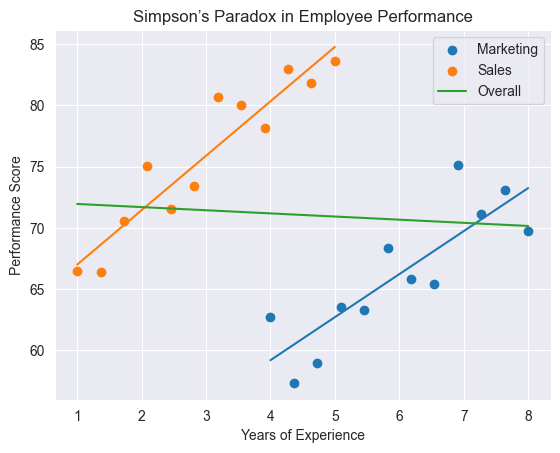

In [37]:
# Generate fake data
np.random.seed(42)
n = 12
years_A = np.linspace(1, 5, n)
performance_A = 60 + 5*years_A + np.random.normal(0, 3, n)
years_B = np.linspace(4, 8, n)
performance_B = 50 + 3*years_B + np.random.normal(0, 3, n)

df_ex = pd.concat([
    pd.DataFrame({'Years': years_A, 'Performance': performance_A, 'Department': 'Sales'}),
    pd.DataFrame({'Years': years_B, 'Performance': performance_B, 'Department': 'Marketing'})
], ignore_index=True)

# Plot
fig, ax = plt.subplots()
for dept, d in df_ex.groupby('Department'):
    ax.scatter(d['Years'], d['Performance'], label=dept)
    s, i = np.polyfit(d['Years'], d['Performance'], 1)
    x_line = np.linspace(d['Years'].min(), d['Years'].max(), 50)
    ax.plot(x_line, s*x_line + i)

# Overall trend line
s_all, i_all = np.polyfit(df_ex['Years'], df_ex['Performance'], 1)
x_all = np.linspace(df_ex['Years'].min(), df_ex['Years'].max(), 50)
ax.plot(x_all, s_all*x_all + i_all, label='Overall')

ax.set_xlabel('Years of Experience')
ax.set_ylabel('Performance Score')
ax.set_title("Simpson’s Paradox in Employee Performance")
ax.legend()
plt.show()


### 10 Rules for Making Nice Plots

1. **Crop to have a tight layout**  
Avoid unnecessary whitespace to keep the focus on the data. Use tools like `plt.tight_layout()` in Matplotlib.

2. **Subplots with comparable data**  
When using subplots, ensure they present similar types of data to allow for meaningful comparisons.

3. **Subplots should use the same axis**  
Use the same scale and range for axes across subplots to avoid misleading comparisons.

4. **Labels and legends**  
Always label axes and include legends when necessary to clarify what the data represents.

5. **X-axis: use meaningful values**  
Choose scales and units that are intuitive and relatable.

6. **Y-axis: use the full zoom range**  
Avoid artificially zooming in on differences that inflate trends. Show the true scale of the data.

7. **Less is more**  
Keep plots simple. Avoid unnecessary gridlines, decorations, or too many colors that distract from the data.

8. **Easy-to-read fonts**  
Use clear, legible fonts with appropriate sizes to ensure readability.

9. **Good captions**  
Provide concise yet informative captions to explain key insights in the plot.

10. **Consistency matters**  
Use the same style, colors, and formats across multiple plots to maintain clarity and coherence.


## Part 3

### Calendar Heatmap (Crime Frequency by Date)

/var/folders/z6/0dqw2m7n37l5vjqcv_822tdr0000gn/T/ipykernel_67812/1192746436.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month_day'] = df_filtered['Date'].dt.strftime('%m-%d')


(<Figure size 1600x300 with 2 Axes>,
 array([<Axes: ylabel='2040'>], dtype=object))

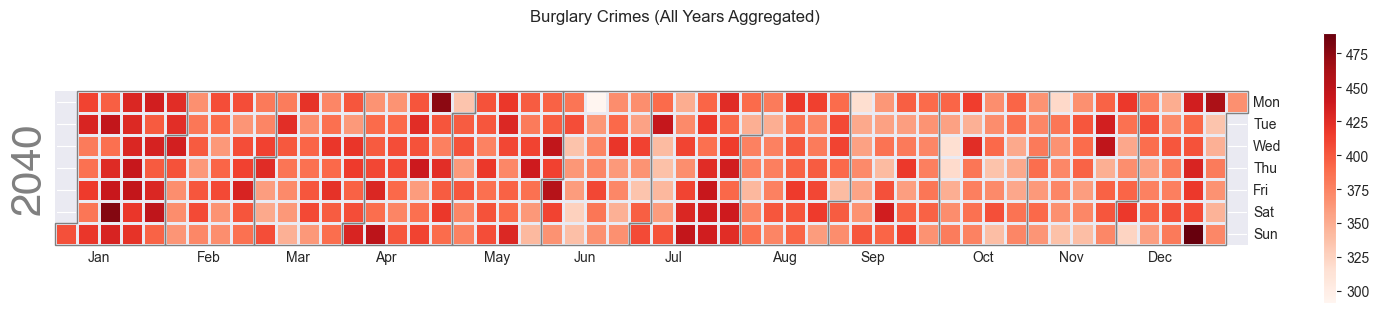

In [38]:
# Convert date column to datetime (if not already)
df['Date'] = pd.to_datetime(df['Date'])

# Filter DataFrame for a specific crime type, e.g. "burglary"
df_filtered = df[df['Category'] == 'BURGLARY']

# Collapse multiple years into (month-day)
df_filtered['month_day'] = df_filtered['Date'].dt.strftime('%m-%d')

# Aggregate crime counts by month_day
crime_counts = (
    df_filtered
    .groupby('month_day')
    .size()                
    .rename('crime_count')
)

# Multiply Feb 29 by 4 (to not screw the color as this date is only represented once every 4th year)
if '02-29' in crime_counts.index:
    crime_counts.loc['02-29'] *= 4

# Create a "fake year" date range because this method needs one year and is not made far accumulating the years
fake_year = 2040 
all_days = pd.date_range(
    start=f'{fake_year}-01-01', 
    end=f'{fake_year}-12-31', 
    freq='D'
)

# Build a DataFrame for that fake year
fake_df = pd.DataFrame(index=all_days)
fake_df.index.name = 'date'
fake_df['month_day'] = fake_df.index.strftime('%m-%d')

# Merge crime counts onto the fake year DataFrame
fake_df = fake_df.reset_index().merge(crime_counts, on='month_day', how='left')

# Re-set the index, fill missing values with 0
fake_df.set_index('date', inplace=True)

# Plot with calplot, horizontal colorbar
calplot.calplot(
    data=fake_df['crime_count'],
    cmap='Reds',
    colorbar=True,
    suptitle='Burglary Crimes (All Years Aggregated)',
    figsize=(16, 3)
)


This calender plot does not show much over the year, but the thing we were looking for does show up. We where expecting to see more reports on burglary around christmass and we do indeed see an increase the 23rd and 24th of December. 

### Polar Bar Chart (Crime Patterns Over 24 Hours)

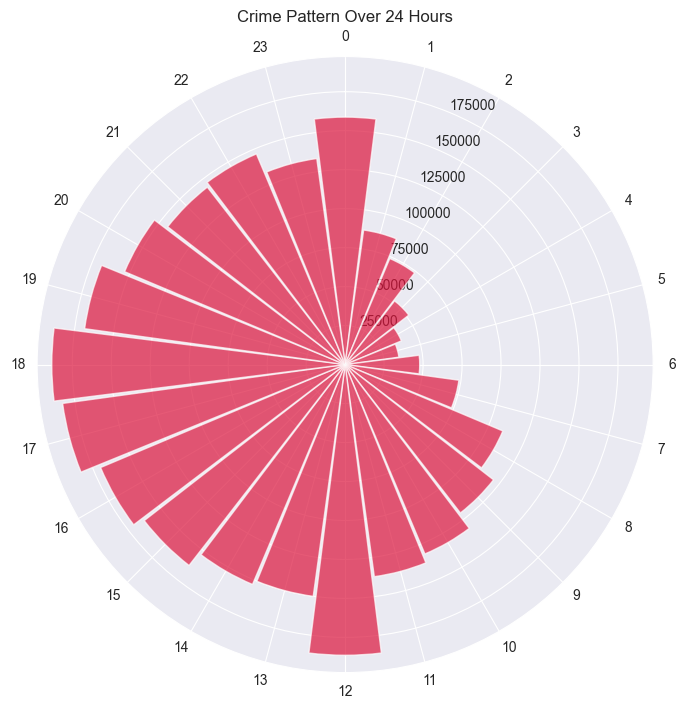

In [39]:
# Load the merged dataset
df_copy = df.copy()

# Convert Time to datetime format
df_copy['Hour'] = pd.to_datetime(df_copy['Time'], format='%H:%M', errors='coerce').dt.hour

# Count crimes per hour
hourly_crime = df_copy['Hour'].value_counts().sort_index()

# Convert to radians for polar plot
theta = np.linspace(0, 2 * np.pi, 24, endpoint=False)
values = hourly_crime.reindex(range(24), fill_value=0).values

# Create polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.bar(theta, values, width=0.25, bottom=0, color='crimson', alpha=0.7)

# Labels and title
ax.set_xticks(theta)
ax.set_xticklabels(range(24))
ax.set_title("Crime Pattern Over 24 Hours")
plt.show()


This ploar plots shows that when you would expects people to be asleep, not many crimes are reported. This doesnt mean that crimes are not committed but at leats they are not reported. Somehow a lot of crimes are reported around lunchtime, then it takes a fall then to reach a climax at 18. 

## Part 4
### Connecting the dots and recreating plots from DAOST but using our own favorite dataset.

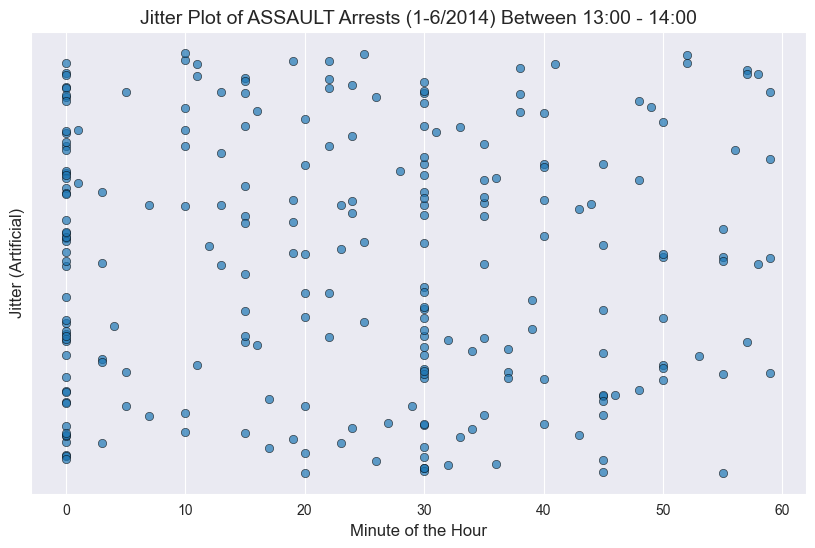

In [40]:
# Convert  Time column to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce')

# Extract year, month, hour, and minute for filtering and plotting
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute

# Define filtering parameters
crime_type = "ASSAULT"  
selected_year = 2014  
start_month, end_month = 1, 6
selected_hour = 13  

# Filter dataset based on crime type, time window, and hour
df_filtered = df[
    (df['Category'] == crime_type) &
    (df['Year'] == selected_year) &
    (df['Month'] >= start_month) & (df['Month'] <= end_month) &
    (df['Hour'] == selected_hour)
].copy()

# Add vertical jitter to avoid overlapping
df_filtered['Jitter'] = np.random.uniform(-0.3, 0.3, size=len(df_filtered))

# Create the jitter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtered['Minute'], y=df_filtered['Jitter'], alpha=0.7, edgecolor="black")

# Labels and title
plt.xlabel("Minute of the Hour", fontsize=12)
plt.ylabel("Jitter (Artificial)", fontsize=12)
plt.title(f"Jitter Plot of {crime_type} Arrests ({start_month}-{end_month}/{selected_year}) Between {selected_hour}:00 - {selected_hour+1}:00", fontsize=14)
plt.yticks([]) 

plt.show()

We see a clear tendency in the jitter-plot around whole and half hours. Furthermore the 15-min past and to the hour, seems to be more promonant. Next we see that every 10 min seem to be often noted, and also a slight tendency at the 5-min marks. 

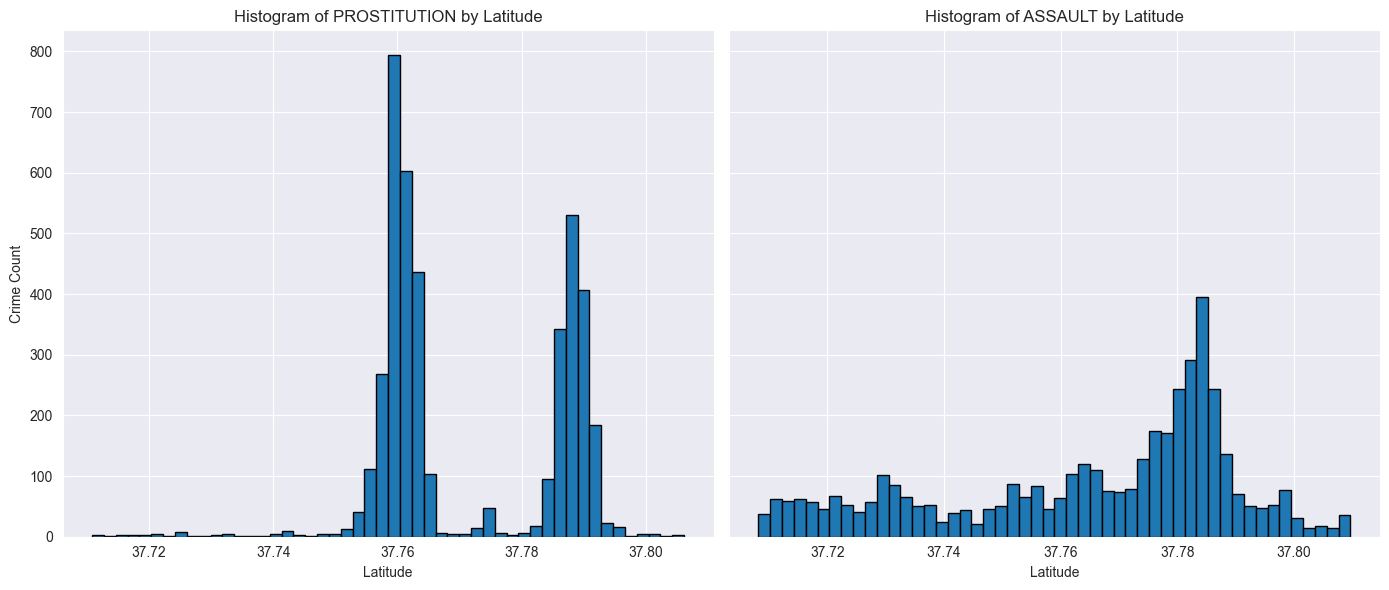

{'PROSTITUTION': 4164, 'ASSAULT': 4228}


In [41]:
# Select two crime types with different geographical patterns
crime_type_1 = "PROSTITUTION"
crime_type_2 = "ASSAULT"

# Choose time interval to get 1000-10000 points
start_date1, end_date1 = "2010-01-01", "2015-01-01"  
start_date2, end_date2 = "2014-01-01", "2014-06-01"  

# Filter dataset
df_filtered_1 = df[(df['Category'] == crime_type_1) & (df['Date'].between(start_date1, end_date1))]
df_filtered_2 = df[(df['Category'] == crime_type_2) & (df['Date'].between(start_date2, end_date2))]

# Extract valid latitudes (San Francisco latitudes range ~37.70 - 37.85)
lat_range = (37.70, 37.85)
latitudes_1 = df_filtered_1['Latitude'].between(*lat_range)
latitudes_2 = df_filtered_2['Latitude'].between(*lat_range)

# Use numpy.histogram to bin latitudes
bins = 50  # Adjust for better resolution
counts_1, bin_edges_1 = np.histogram(df_filtered_1.loc[latitudes_1, 'Latitude'], bins=bins)
counts_2, bin_edges_2 = np.histogram(df_filtered_2.loc[latitudes_2, 'Latitude'], bins=bins)

# Create side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Histogram for crime type 1
axes[0].bar(bin_edges_1[:-1], counts_1, width=np.diff(bin_edges_1), edgecolor="black", align="edge")
axes[0].set_title(f"Histogram of {crime_type_1} by Latitude")
axes[0].set_xlabel("Latitude")
axes[0].set_ylabel("Crime Count")

# Histogram for crime type 2
axes[1].bar(bin_edges_2[:-1], counts_2, width=np.diff(bin_edges_2), edgecolor="black", align="edge")
axes[1].set_title(f"Histogram of {crime_type_2} by Latitude")
axes[1].set_xlabel("Latitude")

# Show the plots
plt.tight_layout()
plt.show()

# Print counts for each crime type
crime_counts = {
    crime_type_1: len(df_filtered_1),
    crime_type_2: len(df_filtered_2)
}

print(crime_counts)

We see in these plots that there seem to be a location based trend in these arrests. We see that Prostitution has two hot spots and that Assult has one less dominant hotspot. 

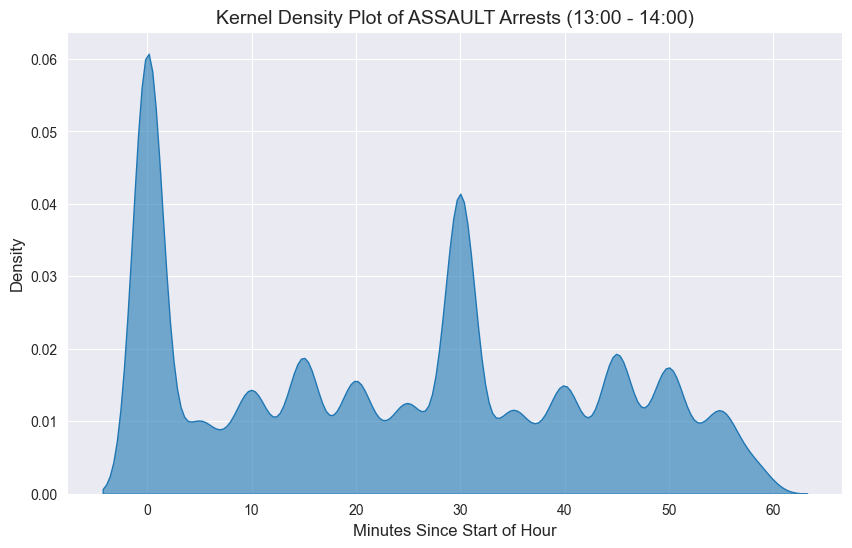

10971


In [42]:
# Select the same crime type and hour range used in the jitter plot
crime_type = "ASSAULT"
selected_hour = 13

df_filtered = df[(df['Category'] == crime_type) & (df['Hour'] == selected_hour)].copy()

# Convert arrest times to minutes since start of the hour (e.g., 13:15 → 15 minutes)
df_filtered['MinutesSinceHourStart'] = df_filtered['Minute']

# Kernel Density Estimation (KDE) using seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(df_filtered['MinutesSinceHourStart'], bw_adjust=0.5, fill=True, alpha=0.6)

# Labels and title
plt.xlabel("Minutes Since Start of Hour", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title(f"Kernel Density Plot of {crime_type} Arrests ({selected_hour}:00 - {selected_hour+1}:00)", fontsize=14)

plt.show()

print(len(df_filtered['MinutesSinceHourStart']))

We see the same tendencies as in the jitty plot with the reports coming in at specific times. Espesually at whole and half hours. 

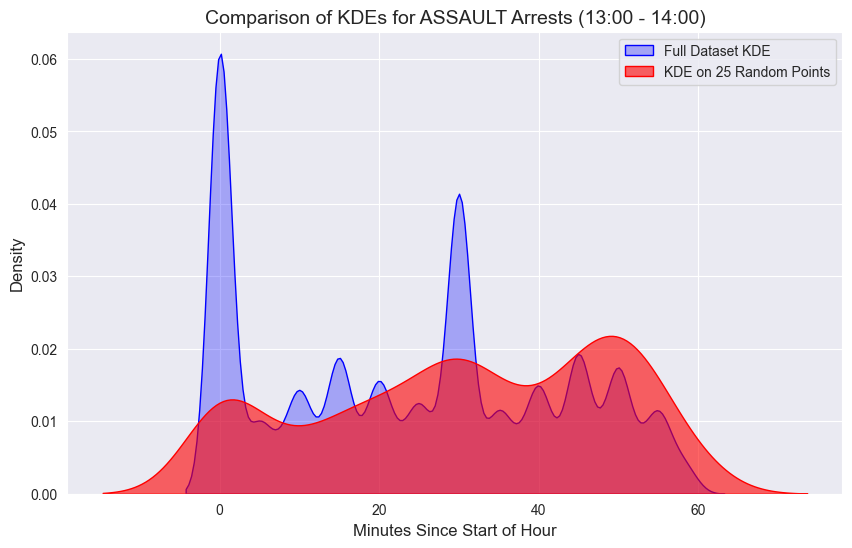

In [43]:
# Select the same crime type and hour range used in the jitter plot
crime_type = "ASSAULT"
selected_hour = 13

df_filtered = df[(df['Category'] == crime_type) & (df['Hour'] == selected_hour)].copy()

# Convert arrest times to minutes since start of the hour (e.g., 13:15 → 15 minutes)
df_filtered['MinutesSinceHourStart'] = df_filtered['Minute']

# Select 25 random points from the dataset
df_sampled = df_filtered.sample(n=25, random_state=42)

# KDE Plot for Full Dataset
plt.figure(figsize=(10, 6))
sns.kdeplot(df_filtered['MinutesSinceHourStart'], bw_adjust=0.5, fill=True, alpha=0.3, color="blue", label="Full Dataset KDE")

# KDE Plot for Sampled 25 Points
sns.kdeplot(df_sampled['MinutesSinceHourStart'], bw_adjust=0.5, fill=True, alpha=0.6, color="red", label="KDE on 25 Random Points")

# Labels and title
plt.xlabel("Minutes Since Start of Hour", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title(f"Comparison of KDEs for {crime_type} Arrests ({selected_hour}:00 - {selected_hour+1}:00)", fontsize=14)
plt.legend()

plt.show()

This demonstrates how KDE with a small sample size can be very misleading as the peaks of the selected data represented in red varies from the complete dataset.

### Excercise Part 2:

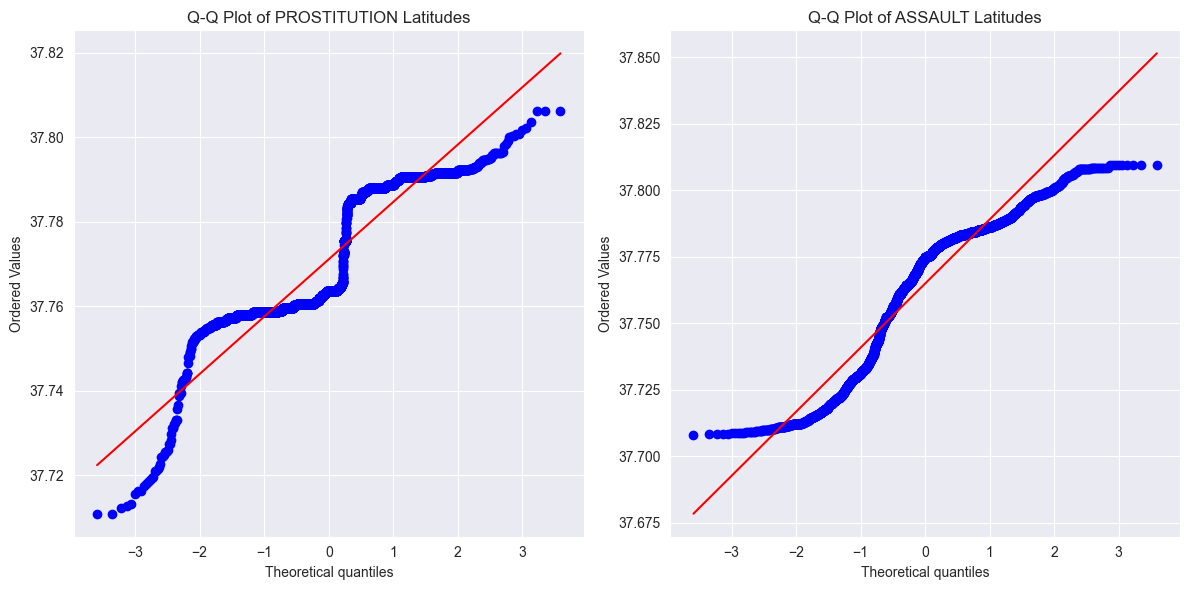

In [44]:
# Extract valid latitudes (San Francisco latitudes ~37.70 - 37.85 to clean up miss-written repports)
lat_range = (37.70, 37.85)
latitudes_1 = df_filtered_1[df_filtered_1['Latitude'].between(*lat_range)]['Latitude']
latitudes_2 = df_filtered_2[df_filtered_2['Latitude'].between(*lat_range)]['Latitude']

# Create Q-Q Plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Q-Q plot for crime type 1
stats.probplot(latitudes_1, dist="norm", plot=axes[0])
axes[0].set_title(f"Q-Q Plot of {crime_type_1} Latitudes")

# Q-Q plot for crime type 2
stats.probplot(latitudes_2, dist="norm", plot=axes[1])
axes[1].set_title(f"Q-Q Plot of {crime_type_2} Latitudes")

plt.tight_layout()
plt.show()

Both distributions show systematic deviations, meaning that the locations of these crimes aren’t randomly scattered across the city. Prostitution is geographically concentrated, suggesting known zones. The same goes for Assaults but its more evenly distributed.

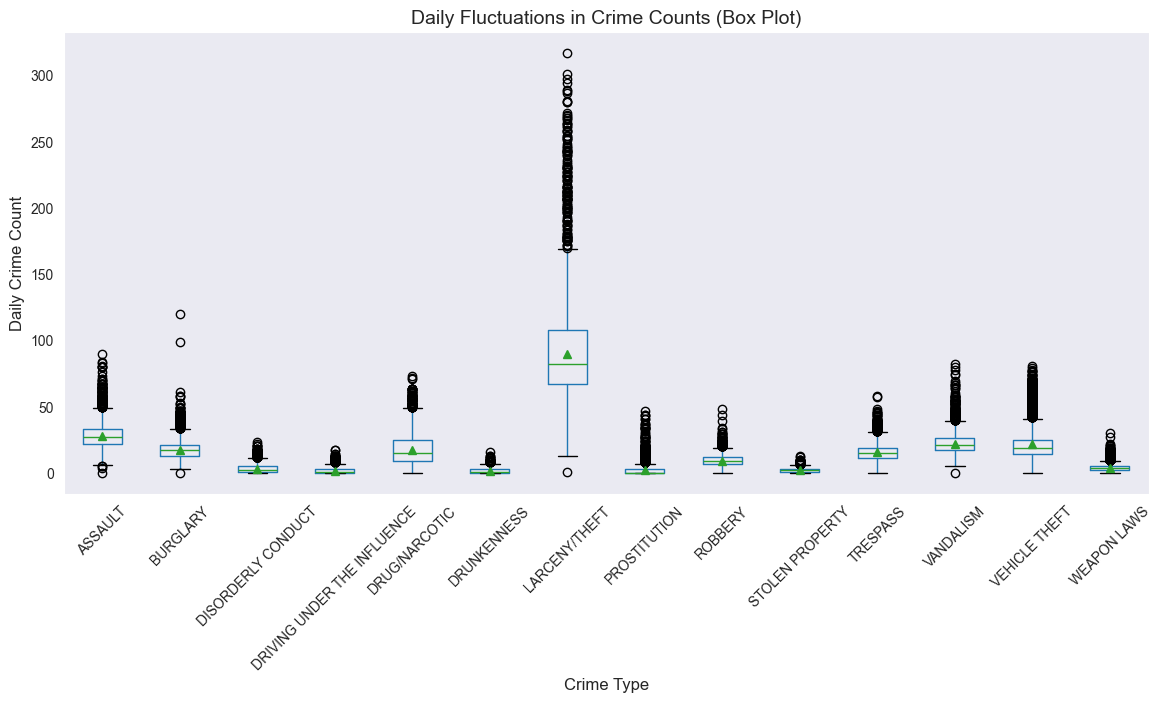

In [45]:
# Filter dataset for focus crimes
df_filtered = df[df['Category'].isin(focuscrimes)]

# Count crimes per day per category
crime_counts_per_day = df_filtered.groupby(['Date', 'Category']).size().reset_index(name='CrimeCount')

# Pivot table to create a format suitable for boxplot
crime_pivot = crime_counts_per_day.pivot(index='Date', columns='Category', values='CrimeCount').fillna(0)

# Create box plot
plt.figure(figsize=(14, 6))
crime_pivot.boxplot(rot=45, grid=False, showmeans=True)

# Labels and title
plt.ylabel("Daily Crime Count", fontsize=12)
plt.xlabel("Crime Type", fontsize=12)
plt.title("Daily Fluctuations in Crime Counts (Box Plot)", fontsize=14)

plt.show()

The main thing the boxplot reveals is the variation from day to day arrests. The bar plot just shows us the cumulated arrests over the years. With the box plot we can get an idea of the typical day, by looking at the size of the box and the mean/median. 

<Figure size 1400x600 with 0 Axes>

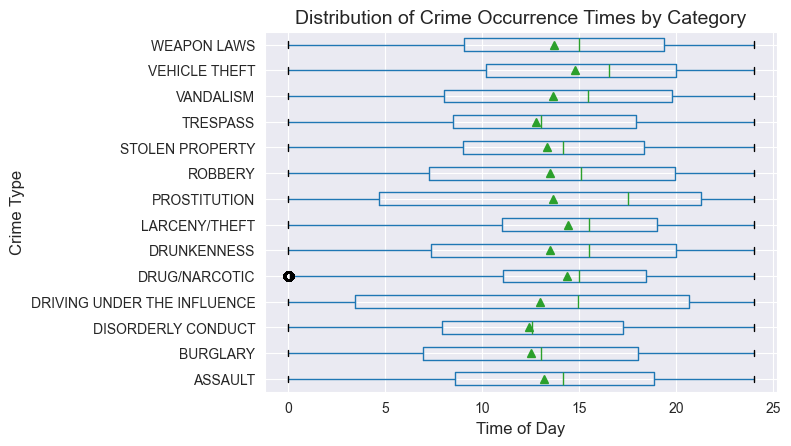

In [46]:
# Extract hours and fractional minutes
df['CrimeHour'] = df['Time'].dt.hour + (df['Time'].dt.minute / 60)

# Filter dataset for focus crimes
df_filtered = df[df['Category'].isin(focuscrimes)].copy()

# Create box plot of crime time-of-day distributions
plt.figure(figsize=(14, 6))
df_filtered.boxplot(column='CrimeHour', by='Category', vert=False, showmeans=True)

# Labels and title
plt.xlabel("Time of Day", fontsize=12)
plt.ylabel("Crime Type", fontsize=12)
plt.title("Distribution of Crime Occurrence Times by Category", fontsize=14)
plt.suptitle("")  

plt.show()

## Part 5

In [47]:
# Filter only PROSTITUTION crimes
df_pros = df[df['Category'] == 'PROSTITUTION'].copy()

# Remove rows with invalid lat/long (e.g., missing, 0, or out of SF range)
df_pros = df_pros.dropna(subset=['Latitude', 'Longitude'])
df_pros = df_pros[(df_pros['Latitude'].between(37.70, 37.85)) & 
                  (df_pros['Longitude'].between(-122.53, -122.35))]

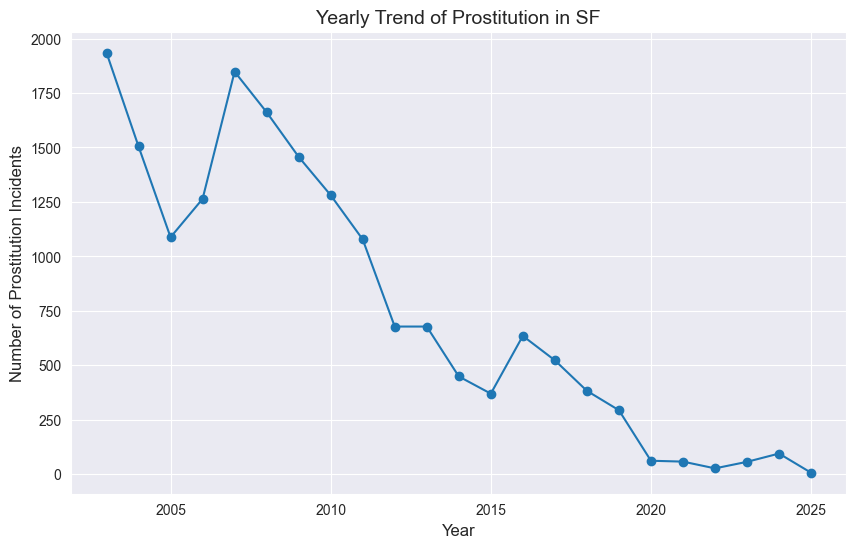

In [48]:
# 1) Group by year to see how prostitution changed over time
df_pros['Year'] = df_pros['Date'].dt.year
yearly_counts = df_pros.groupby('Year').size().reset_index(name='Count')

# 2) Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts['Year'], yearly_counts['Count'], marker='o')
plt.title("Yearly Trend of Prostitution in SF", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Prostitution Incidents", fontsize=12)
plt.grid(True)
plt.show()


Generally we see that the amount of reported  prostitution has been on a decline in the SF area from 2003 till now. 

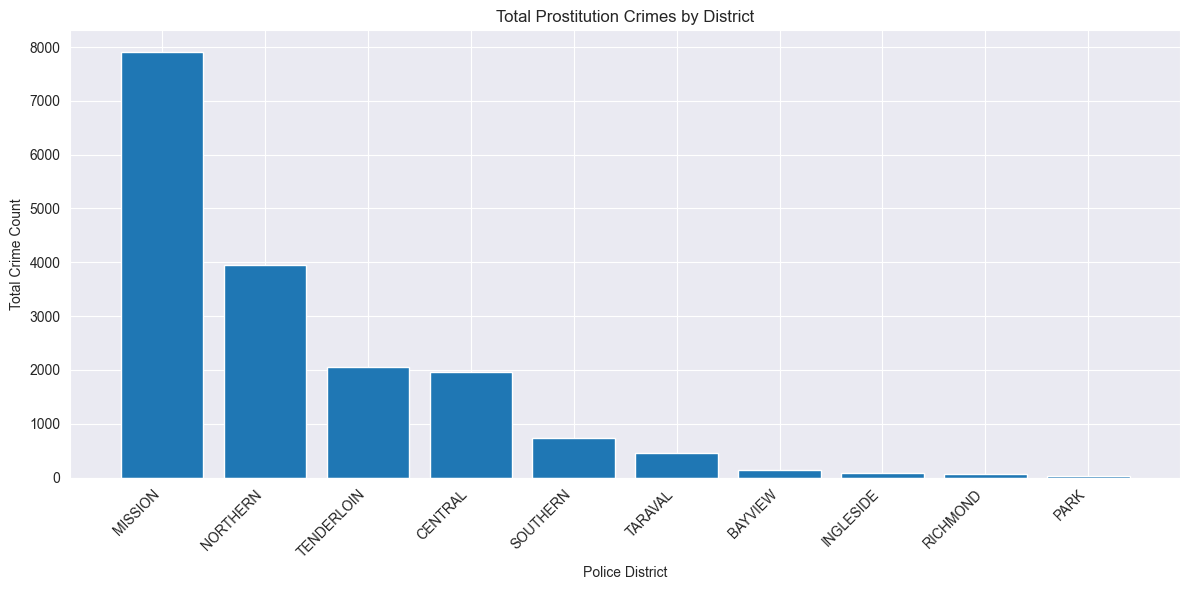

In [49]:
# Group by Police District and sum the total crime counts
district_total = df_pros.groupby('PoliceDistrict').size().reset_index(name='Total Count')

# Sort by count for better visualization
district_total = district_total.sort_values(by='Total Count', ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(district_total['PoliceDistrict'], district_total['Total Count'])
plt.title("Total Prostitution Crimes by District")
plt.xlabel("Police District")
plt.ylabel("Total Crime Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Looking at the accumulated reported prostitution by district, we see that the arrests are heavily screwed toward some districts. District "Mission" seam to be a hotspot, and the three runner-ups "Northern", "Tenderloin" & "Central" also have noticeably more arrests than the rest. 

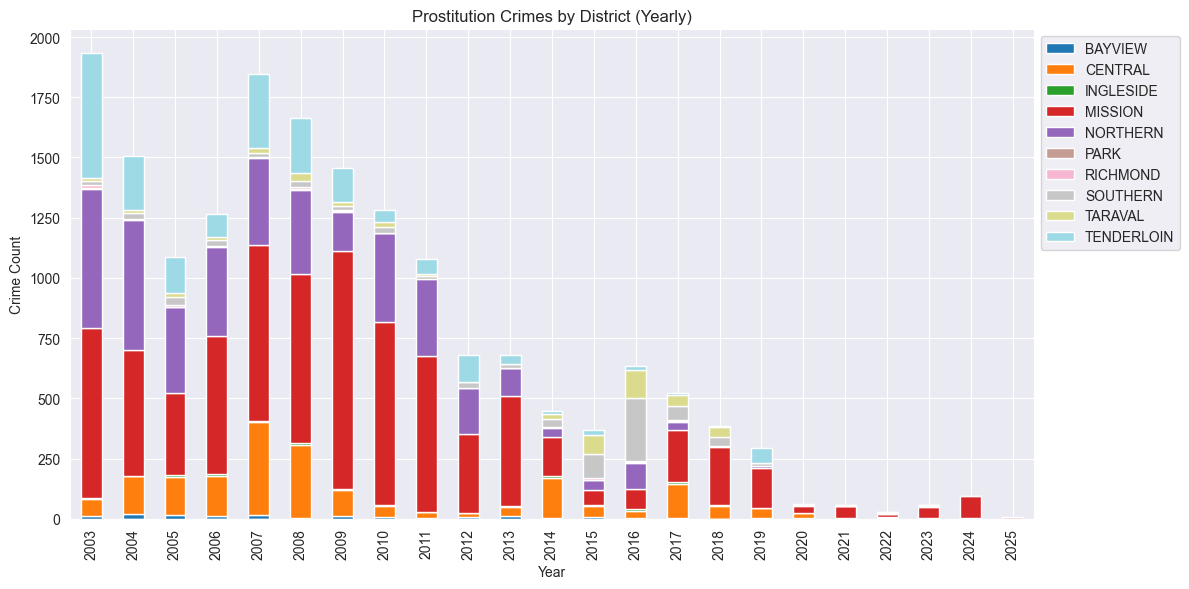

In [50]:
# Ensure PoliceDistrict column has no NaN values
df_pros['PoliceDistrict'] = df_pros['PoliceDistrict'].fillna("UNKNOWN")

# Extract year from the Date column
df_pros['Year'] = df_pros['Date'].dt.year

# Group by Year and Police District
yearly_district = df_pros.groupby(['Year', 'PoliceDistrict']).size().reset_index(name='Count')

# Pivot table for easier plotting
district_pivot = yearly_district.pivot(index='Year', columns='PoliceDistrict', values='Count').fillna(0)

# Plot stacked bar chart
district_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Prostitution Crimes by District (Yearly)")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


Looking at the trends over the years, we see that it is more or less the same districts as mentioned earlier that dominates the reports each year.  

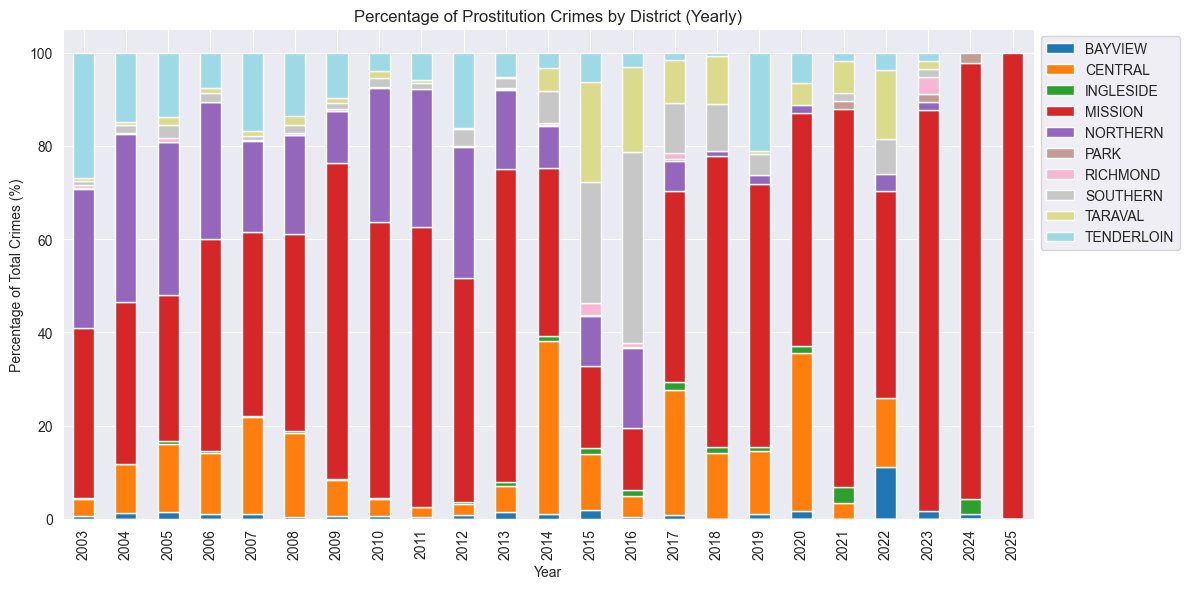

In [51]:
# Group by Year and Police District to get total counts
yearly_district = df_pros.groupby(['Year', 'PoliceDistrict']).size().reset_index(name='Count')

# Calculate total prostitution cases per year
yearly_total = df_pros.groupby('Year').size().reset_index(name='Total')

# Merge with yearly_district to get percentage
yearly_district = yearly_district.merge(yearly_total, on='Year')
yearly_district['Percentage'] = (yearly_district['Count'] / yearly_district['Total']) * 100

# Pivot table for easier plotting
district_pivot = yearly_district.pivot(index='Year', columns='PoliceDistrict', values='Percentage').fillna(0)

# Plot stacked bar chart
district_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Percentage of Prostitution Crimes by District (Yearly)")
plt.xlabel("Year")
plt.ylabel("Percentage of Total Crimes (%)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

Looking at this plot we see the amount of the total prostitution was reported in the individual districts. We see a clear trend over the last couple years, that the prostitution has moved into one specific area namely the "Mission" district.

### Map over the SF Police Disstricts 
Before looking at our data on the map we look at the actual placement of the individual PD's:
![Image](https://lh4.googleusercontent.com/-SVEsrsxL318/VKCIq3U8lfI/AAAAAAAAbug/REilUPI6NxI/s960/SFPDdistricts2.jpg)

In [52]:
# Group the prostitution crimes by Year
year_groups = df_pros.groupby("Year")

heatmap_data = []
time_labels = []

# For each year collect ["Latitude", "Longitude"] pairs
for year, group in year_groups:
    lat_lon_pairs = group[["Latitude", "Longitude"]].values.tolist()
    heatmap_data.append(lat_lon_pairs)
    time_labels.append(str(year))  
    
# Initialize Folium map around SF
m = folium.Map(location=[37.7749, -122.4194], zoom_start=13)

# Add a time-lapse heatmap
HeatMapWithTime(
    data=heatmap_data,
    index=time_labels,
    radius=15,       
    auto_play=True, 
    max_opacity=0.7  
).add_to(m)

# Save or display
m.save("prostitution_heatmap_by_year.html")
m


Looking at this heatmap we see that there are two main hotspots that stay more or less the same over the years. The first one is located in the "Mission" district and the other is on the intersection between the three districts "Northern", "Tenderloin" & "Central". 

This explains why we saw by far the most repports in "Mission" and a smaller but still great amount of reports from "Northern", "Tenderloin" & "Central". 

We see that over the years the general prostitution has gone down. The "northern hotspot" has basically disappeared and (as we can also see in the "Percentage of Prostitution Crimes by District (Yearly)" graf) from 2023, 85% or more of the reported prostitution came from "Mission".

## Use of AI in This Project
Artificial Intelligence has been in multiple aspects of this project. AI tools were used to clean up and improve readability with comments. 
Additionally, AI provided guidance on methodological approaches to ensure better practise were followed. A key contribution was in the data wrangling part, where AI transformed and aligning datasets to accurate match parts of the two datasets. 

## Contributions
All three team members contributed across all five parts of the project. All members have completed the weekly exercises need for this project. The final result is a combination of different approaches, reflecting the work of individual efforts into the resulting outcome.